In [1]:
import tensorflow

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras import backend as K
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
import pickle
import matplotlib.pyplot as plt

In [5]:
filename='C:\\Users\\KAJUL\\Desktop\\Assignment3\\trainX.pickle'
infile1 = open(filename,'rb')
trainx = pickle.load(infile1)
filename='C:\\Users\\KAJUL\\Desktop\\Assignment3\\testX.pickle'
infile2 = open(filename,'rb')
testx = pickle.load(infile2)
filename='C:\\Users\\KAJUL\\Desktop\\Assignment3\\trainY.pickle'
infile3 = open(filename,'rb')
trainy = pickle.load(infile3)

In [6]:
# input image dimensions
img_rows, img_cols = 28, 28
x_train, x_valid,y_train,y_valid=train_test_split(trainx,trainy,test_size=0.16666)
# the data, shuffled and split between train and test sets

In [7]:
print(x_train.shape)
print(y_valid.shape)
print(x_valid.shape)
print(y_train.shape)

(50000, 28, 28)
(10000,)
(10000, 28, 28)
(50000,)


In [8]:
batch_size = 128
num_classes = 10
epochs = 100

In [9]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_train /= 255
x_valid /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

x_train shape: (50000, 28, 28)
50000 train samples
10000 test samples


In [10]:
x_train = np.reshape(x_train, (50000, 784))
x_valid = np.reshape(x_valid, (10000, 784))
print(y_valid.shape)
model = Sequential()
model.add(Dense(500, input_dim=784), )
model.add(Activation('relu'))
# model.add(Dropout(0.4))
model.add(Dense(300))
model.add(Activation('relu'))
# model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

W0623 16:07:53.466972 11776 deprecation_wrapper.py:119] From C:\Users\KAJUL\Anaconda3\envs\hello-tf\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 16:07:53.534957 11776 deprecation_wrapper.py:119] From C:\Users\KAJUL\Anaconda3\envs\hello-tf\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 16:07:53.546952 11776 deprecation_wrapper.py:119] From C:\Users\KAJUL\Anaconda3\envs\hello-tf\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



(10000, 10)


W0623 16:07:53.769730 11776 deprecation_wrapper.py:119] From C:\Users\KAJUL\Anaconda3\envs\hello-tf\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0623 16:07:53.811911 11776 deprecation_wrapper.py:119] From C:\Users\KAJUL\Anaconda3\envs\hello-tf\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_valid, y_valid))

score = model.evaluate(x_valid, y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W0623 16:08:02.219030 11776 deprecation.py:323] From C:\Users\KAJUL\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0623 16:08:02.595679 11776 deprecation_wrapper.py:119] From C:\Users\KAJUL\Anaconda3\envs\hello-tf\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 229us/step - loss: 0.5886 - acc: 0.7868 - val_loss: 0.4334 - val_acc: 0.8443
Epoch 2/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.4037 - acc: 0.8528 - val_loss: 0.3674 - val_acc: 0.8659
Epoch 3/100
50000/50000 [==============================] - 9s 182us/step - loss: 0.3540 - acc: 0.8686 - val_loss: 0.4134 - val_acc: 0.8497
Epoch 4/100
50000/50000 [==============================] - 9s 184us/step - loss: 0.3244 - acc: 0.8795 - val_loss: 0.3524 - val_acc: 0.8673
Epoch 5/100
50000/50000 [==============================] - 9s 180us/step - loss: 0.3034 - acc: 0.8875 - val_loss: 0.3217 - val_acc: 0.8820
Epoch 6/100
50000/50000 [==============================] - 10s 195us/step - loss: 0.2835 - acc: 0.8940 - val_loss: 0.3217 - val_acc: 0.8799
Epoch 7/100
50000/50000 [==============================] - 9s 180us/step - loss: 0.2715 - acc: 0.8990 - val_loss: 

50000/50000 [==============================] - 9s 171us/step - loss: 0.0440 - acc: 0.9835 - val_loss: 0.5168 - val_acc: 0.8994
Epoch 60/100
50000/50000 [==============================] - 9s 172us/step - loss: 0.0390 - acc: 0.9851 - val_loss: 0.5976 - val_acc: 0.8959
Epoch 61/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.0380 - acc: 0.9863 - val_loss: 0.5622 - val_acc: 0.8982
Epoch 62/100
50000/50000 [==============================] - 9s 170us/step - loss: 0.0377 - acc: 0.9863 - val_loss: 0.5815 - val_acc: 0.8965
Epoch 63/100
50000/50000 [==============================] - 8s 169us/step - loss: 0.0374 - acc: 0.9863 - val_loss: 0.5816 - val_acc: 0.8905
Epoch 64/100
50000/50000 [==============================] - 8s 168us/step - loss: 0.0376 - acc: 0.9858 - val_loss: 0.6124 - val_acc: 0.8963
Epoch 65/100
50000/50000 [==============================] - 8s 170us/step - loss: 0.0361 - acc: 0.9872 - val_loss: 0.5935 - val_acc: 0.8926
Epoch 66/100
50000/50000 [=======

In [12]:
testx = np.reshape(testx, (10000, 784))
pred=model.predict(testx)
pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
pickle.dump(pred,open("testY.pickle",'wb'))

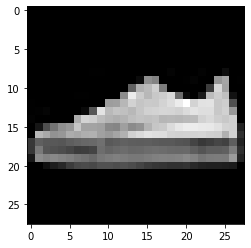

In [19]:
plt.imshow(testx[5500],cmap='gist_gray')

In [20]:
trainy[5500]

7

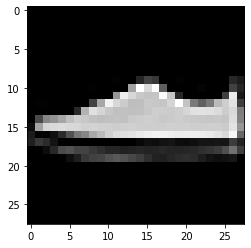

In [21]:
plt.imshow(trainx[20000],cmap='gist_gray')